In [1]:
from sklearn import metrics                           # Metricas para calcular accuracy score
from sklearn.linear_model import LogisticRegression   # Modelo utilizado
from sklearn.model_selection import train_test_split  # Separa dados de treinamento e teste
from sklearn.datasets import load_breast_cancer       # Carrega o dataset Breast Cancer    
import matplotlib.pyplot as plt                       # Plotagem de gráficos

Separando os dados em teste e treino, e utilizando o modelo logistico de regressão para a estimação.

In [14]:
# Carregando Breast Cancer Dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [15]:
# Separando o Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

In [16]:
# Criando um modelo 
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
#Calculando a precisão do modelo.

print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9521276595744681


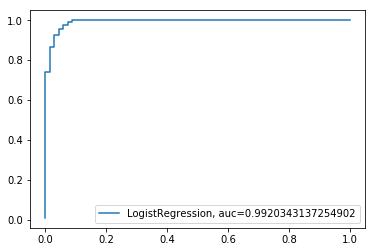

In [18]:
# Plotando o o objetivo do exercício o gráfico AUC derivado do gráfico ROC.

#AUC Curve

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="LogistRegression, auc="+str(auc))
plt.legend(loc=4)


Comparando agora com um modelo de arvore de descisão simples, para ver o que apresenta a melhor separabilidade.

In [19]:
from sklearn.tree import DecisionTreeClassifier

#Criando o modelo

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)




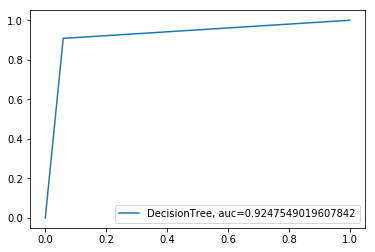

In [20]:
y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr1, tpr1, _1 = metrics.roc_curve(y_test,  y_pred_probability)
auc1 = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr1,tpr1,label="DecisionTree, auc="+str(auc1))
plt.legend(loc=4)


Utilizando o RandomForest para comparação entre os três modelos.

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

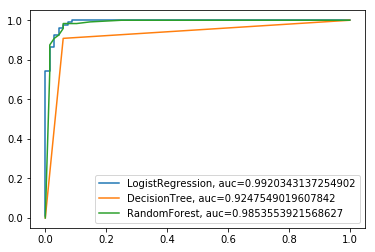

In [22]:
y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr2, tpr2, _2 = metrics.roc_curve(y_test,  y_pred_probability)
auc2 = metrics.roc_auc_score(y_test, y_pred_probability)

plt.plot(fpr,tpr,label="LogistRegression, auc="+str(auc))
plt.plot(fpr1,tpr1,label="DecisionTree, auc="+str(auc1))
plt.plot(fpr2,tpr2,label="RandomForest, auc="+str(auc2))

plt.legend(loc=4)
plt.show()

O desempenho da regressão Logistica se apresentou com maior separabiliade, portanto este modelo esta classificando com 99% de acurácia os 0 como 0 e o 1 como 1.